# ***Gaussian Naive Bayes***



In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp

df = pd.read_csv('diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dsmean = df['Pregnancies'].mean()

In [ ]:
for x in df.index:
  if df.loc[x, "Pregnancies"] == 0:
    df.loc[x, "Pregnancies"] = dsmean

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.000000,148,72,35,0,33.6,0.627,50,1
1,1.000000,85,66,29,0,26.6,0.351,31,0
2,8.000000,183,64,0,0,23.3,0.672,32,1
3,1.000000,89,66,23,94,28.1,0.167,21,0
4,3.845052,137,40,35,168,43.1,2.288,33,1


In [ ]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI',  'Age', 'Glucose', 'BloodPressure','DiabetesPedigreeFunction']
x = df[feature_cols]
y = df.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0]


In [ ]:
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 80.51948051948052


In [ ]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[95 12]
 [18 29]]


# ***Regression Tree***


In [ ]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp

df = pd.read_csv('Walmart_sales.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
feature_cols = ['Store', 'Weekly_Sales',  'Temperature', 'Fuel_Price','Unemployment']
x = df[feature_cols]
y = df.CPI

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [ ]:
model = DecisionTreeRegressor(random_state=1,max_depth = 4)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred

array([128.82642013, 163.26449358, 137.29288321, ..., 189.40900321,
       189.40900321, 189.40900321])

[Text(0.5, 0.9, 'Store <= 9.5\nsquared_error = 1549.12\nsamples = 5148\nvalue = 171.146'),
 Text(0.25, 0.7, 'Weekly_Sales <= 1848197.125\nsquared_error = 838.29\nsamples = 1055\nvalue = 204.59'),
 Text(0.125, 0.5, 'Unemployment <= 7.869\nsquared_error = 171.999\nsamples = 862\nvalue = 213.568'),
 Text(0.0625, 0.3, 'Fuel_Price <= 3.089\nsquared_error = 94.279\nsamples = 697\nvalue = 217.403'),
 Text(0.03125, 0.1, 'squared_error = 168.781\nsamples = 267\nvalue = 211.637'),
 Text(0.09375, 0.1, 'squared_error = 14.56\nsamples = 430\nvalue = 220.983'),
 Text(0.1875, 0.3, 'Store <= 3.0\nsquared_error = 175.723\nsamples = 165\nvalue = 197.368'),
 Text(0.15625, 0.1, 'squared_error = 4.766\nsamples = 43\nvalue = 213.144'),
 Text(0.21875, 0.1, 'squared_error = 117.339\nsamples = 122\nvalue = 191.807'),
 Text(0.375, 0.5, 'Store <= 3.0\nsquared_error = 1846.217\nsamples = 193\nvalue = 164.491'),
 Text(0.3125, 0.3, 'Fuel_Price <= 3.051\nsquared_error = 21.743\nsamples = 70\nvalue = 215.757'),
 Text

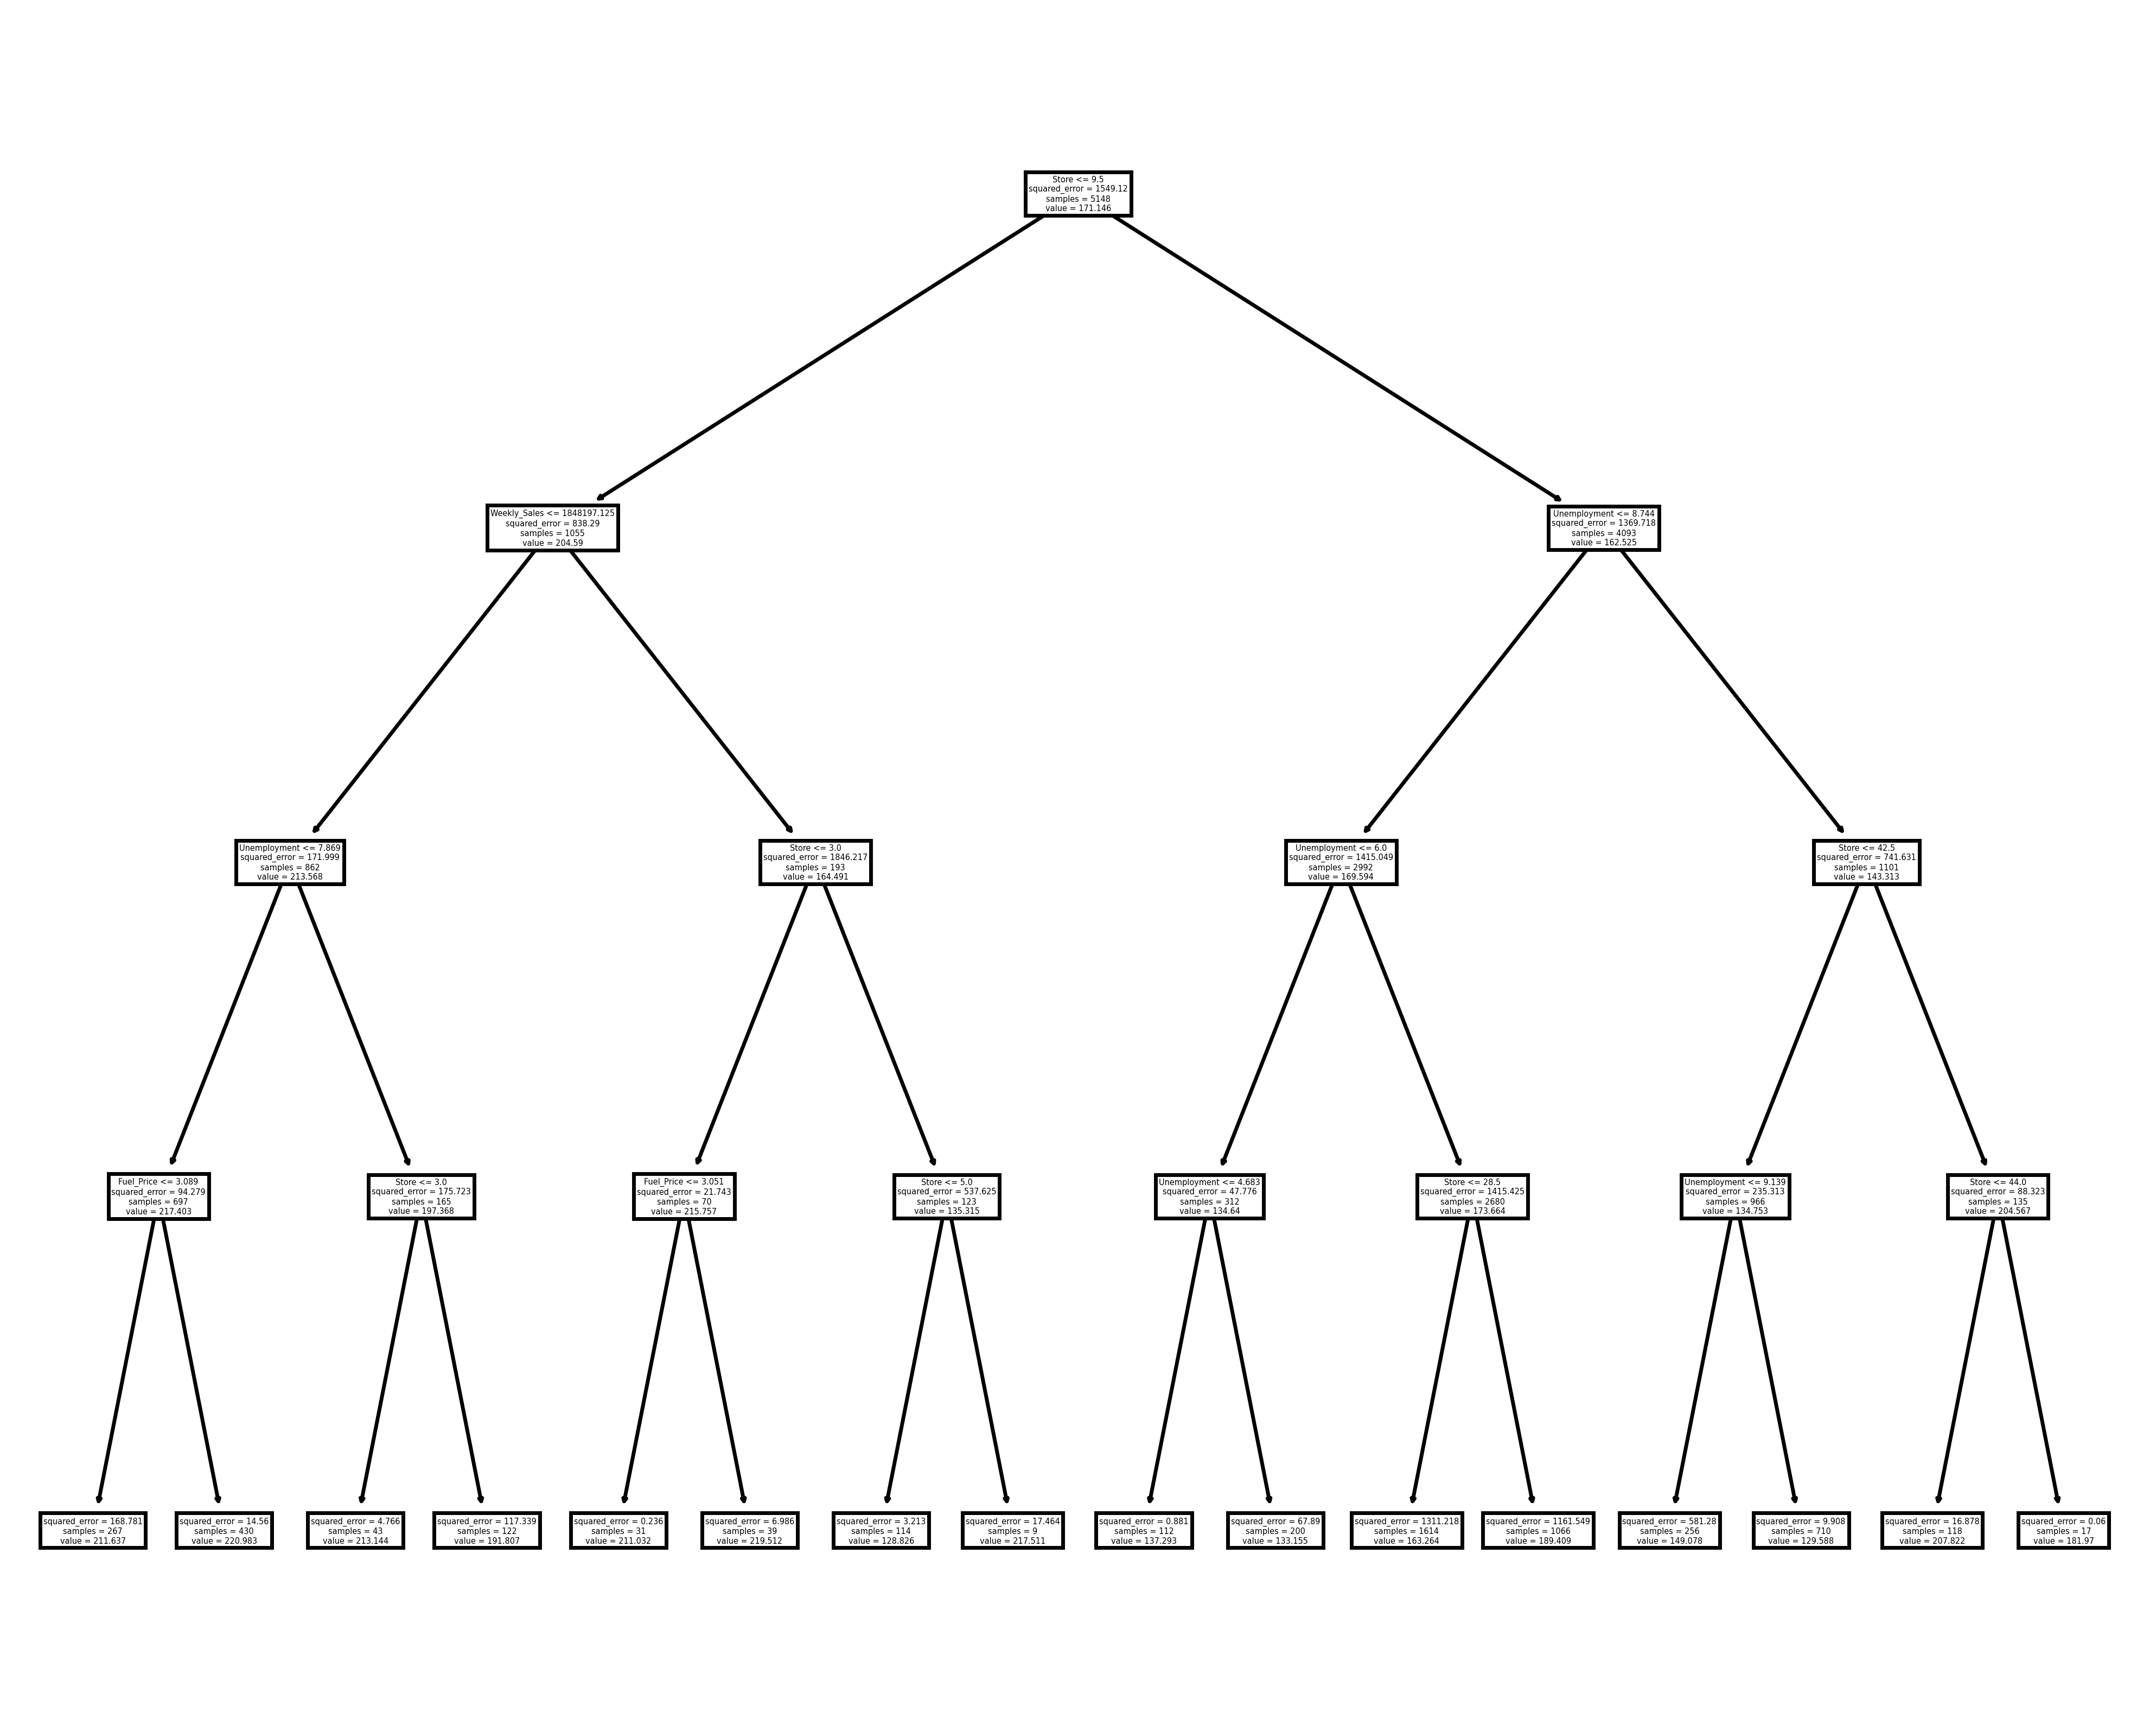

In [ ]:
mtp.figure(figsize=(10,8), dpi = 500)
plot_tree(model,feature_names=x.columns)